### Your name:

<pre> Isaac Aktam</pre>

### Collaborators:

<pre> Ashish Gupta, Konrad Korzeniewski</pre>


## Assignment for Module 5, Training Models

In this assignment you will train different models on a given data set, and find the one that performs best

### Getting the data for the assignment (similar to the notebook from chapter 2 of Hands-On...)

In [2]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [3]:
fetch_housing_data()

In [4]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [5]:
housing = load_housing_data()

### Fix the categories in the categorical variable

In [6]:
d = {'<1H OCEAN':'LESS_1H_OCEAN', 'INLAND':'INLAND', 'ISLAND':'ISLAND', 'NEAR BAY':'NEAR_BAY', 'NEAR OCEAN':'NEAR_OCEAN'}
housing['ocean_proximity'] = housing['ocean_proximity'].map(lambda s: d[s])

### Add 2 more features

In [7]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["population_per_household"]=housing["population"]/housing["households"]

### Fix missing data

In [8]:
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=True) 

### Create dummy variables based on the categorical variable

In [9]:
one_hot = pd.get_dummies(housing['ocean_proximity'])
housing = housing.drop('ocean_proximity', axis=1)
housing = housing.join(one_hot)

### Check the data

In [10]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 16 columns):
longitude                   20640 non-null float64
latitude                    20640 non-null float64
housing_median_age          20640 non-null float64
total_rooms                 20640 non-null float64
total_bedrooms              20640 non-null float64
population                  20640 non-null float64
households                  20640 non-null float64
median_income               20640 non-null float64
median_house_value          20640 non-null float64
rooms_per_household         20640 non-null float64
population_per_household    20640 non-null float64
INLAND                      20640 non-null uint8
ISLAND                      20640 non-null uint8
LESS_1H_OCEAN               20640 non-null uint8
NEAR_BAY                    20640 non-null uint8
NEAR_OCEAN                  20640 non-null uint8
dtypes: float64(11), uint8(5)
memory usage: 1.8 MB


# ASSIGNMENT

### 1. Partition into train and test

Use train_test_split from sklearn.model_selection to partition the dataset into 70% for training and 30% for testing.

You can use the 70% for training set as both training and validation by using cross-validation.


In [11]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size = 0.3, random_state = 42)## YOUR CODE HERE ## REMEMBER TO INCLUDE THE RANDOM STATE = 42

# Do we use the stratified sampling?

### Features

In [12]:
target = 'median_house_value'
features = list(train_set.columns)
features = [f for f in features if f!=target]

In [13]:
features

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_household',
 'population_per_household',
 'INLAND',
 'ISLAND',
 'LESS_1H_OCEAN',
 'NEAR_BAY',
 'NEAR_OCEAN']

In [14]:
X_tr = train_set[features]
y_tr = train_set[[target]]

X_te = test_set[features]
y_te = test_set[[target]]

### 2. Polynomial transformations

Use PolynomialFeatures from sklearn.preprocessing

In [15]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
poly.fit(X_tr)
X_tr = poly.fit_transform(X_tr)## YOUR CODE HERE ##
X_te = poly.transform(X_te)## YOUR CODE HERE ##

In [16]:
# Let's get the names of all the 136 features as we would need to isolate the categorical featues for further analysis

import numpy as np

array_of_features = np.array(features)
feature_names_transformed = poly.get_feature_names(array_of_features)
feature_names_transformed

['1',
 'longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_household',
 'population_per_household',
 'INLAND',
 'ISLAND',
 'LESS_1H_OCEAN',
 'NEAR_BAY',
 'NEAR_OCEAN',
 'longitude^2',
 'longitude latitude',
 'longitude housing_median_age',
 'longitude total_rooms',
 'longitude total_bedrooms',
 'longitude population',
 'longitude households',
 'longitude median_income',
 'longitude rooms_per_household',
 'longitude population_per_household',
 'longitude INLAND',
 'longitude ISLAND',
 'longitude LESS_1H_OCEAN',
 'longitude NEAR_BAY',
 'longitude NEAR_OCEAN',
 'latitude^2',
 'latitude housing_median_age',
 'latitude total_rooms',
 'latitude total_bedrooms',
 'latitude population',
 'latitude households',
 'latitude median_income',
 'latitude rooms_per_household',
 'latitude population_per_household',
 'latitude INLAND',
 'latitude ISLAND',
 'latitude LESS_1H_OCEAN',
 'latitude NEAR_BAY',
 'latitud

In [17]:
np.array(feature_names_transformed).shape

(136,)

In [18]:
# Let's get the location of each of the squared categorical variable

list_of_cat_vars = ['INLAND', 'ISLAND', 'LESS_1H_OCEAN', 'NEAR_BAY', 'NEAR_OCEAN', 
                    'INLAND ISLAND', 'INLAND LESS_1H_OCEAN', 'INLAND NEAR_BAY', 'INLAND NEAR_OCEAN',
                    'ISLAND LESS_1H_OCEAN', 'ISLAND NEAR_BAY', 'ISLAND NEAR_OCEAN',
                    'LESS_1H_OCEAN NEAR_BAY', 'LESS_1H_OCEAN NEAR_OCEAN',
                    'NEAR_BAY NEAR_OCEAN',
                    'INLAND^2', 'ISLAND^2', 'LESS_1H_OCEAN^2', 'NEAR_BAY^2', 'NEAR_OCEAN^2']

indexes_of_cat_vars = [feature_names_transformed.index(item) for item in list_of_cat_vars]
# [11, 12, 13, 14, 15, 122, 123, 124, 125, 127, 128, 129, 131, 132, 134, 121, 126, 130, 133, 135]

##### You should obtain X_tr and X_te with 136 columns each, since originally you had 15 features.

##### With m original features, the new added polynomial features of degree 2 are: $(m^2-m)/2+m+1$. Why?

##### These, plus the original features gives a total of  $(m^2-m)/2+2m+1$

##### PolynomialFeatures(degree=d) transforms an array containing n features into an array containing $(n+d)!/(d!n!)$ features

In [19]:
print("Original number of features: "+str(len(features)))
print("Final number of features: "+str(X_tr.shape[1]))

Original number of features: 15
Final number of features: 136


### 3. Scaling features

Similarly, use StandardScaler from sklearn.preprocessing to normalize the training and testing data, using the training data

In [20]:
#Hold on to this for now, I want to try something else

from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin

# There is nothing in Scikit-Learn to handle Pandas DataFrames, so we need to write a custom transformer for this
# task

# DataFrameSelector is correct

indexes_of_X_tr = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 
                     26, 27, 28, 29, 30,  31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 
                     49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 
                     72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86,  87, 88, 89, 90, 91, 92, 93, 
                     94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 
                     112, 113, 114, 115, 116, 117, 118, 119, 120, 122, 123, 124, 125, 127, 128, 129, 
                     131, 132, 134, 135]

cat_attribs = [11, 12, 13, 14, 15, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135]
#cat_attribs = list(map(str, list_of_cat_indexes)) # integers are transformend into strings; to be used in dataframe

# Transform X_tr and X_te into pandas dataframe

X_tr = pd.DataFrame(X_tr)
X_te = pd.DataFrame(X_te)

# Create the pipelines

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y = None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values    
    
num_data = X_tr.drop(cat_attribs, axis = 1)

num_attribs = list(num_data)

num_pipeline = Pipeline([('selector', DataFrameSelector(num_attribs)),
                         ('std_scaler', StandardScaler())])


cat_pipeline = Pipeline([('selector', DataFrameSelector(cat_attribs))])

full_pipeline = FeatureUnion([("num_pipeline", num_pipeline), 
                              ("cat_pipeline", cat_pipeline)])

In [21]:
X_train_trans = full_pipeline.fit_transform(X_tr) # Transform the X_tr values

X_test_trans = full_pipeline.transform(X_te) # Transform the X_te values

from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([('std_scaler', StandardScaler())])

y_train_trans = num_pipeline.fit_transform(y_tr) # Transform the y_tr values
y_test_trans = num_pipeline.transform(y_te) # Transform the y_te values

#### Comparing models

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import numpy as np

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())

### 4. Linear regression on original features (no transformations) --- benchmark

#### Your goal is to find the model that minimizes the rmse score

In [23]:
from sklearn.linear_model import LinearRegression
lin_scores = cross_val_score(LinearRegression(), train_set[features], train_set[target], scoring="neg_mean_squared_error", cv=4)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [70142.55721218 67456.39127204 67318.3258893  70866.26065275]
Mean: 68945.88375656825


### 5. Linear regression  (on transformed features: polynomial transformation + scaling)

Now do as in 4 but with the original and transformed features (136 features)

In [24]:
from sklearn.linear_model import LinearRegression ## YOUR CODE HERE ##
lin_scores = cross_val_score(LinearRegression(), X_train_trans, y_train_trans, scoring="neg_mean_squared_error", cv=4) ## YOUR CODE HERE ##
lin_rmse_scores = np.sqrt(-lin_scores) ## YOUR CODE HERE ##
display_scores(lin_rmse_scores) ## YOUR CODE HERE ##

Scores: [3.55940432e+09 9.16652461e+09 1.14155948e+09 1.86803676e+11]
Mean: 50167791197.25261


If the error on the cross-validation is too high it is because the model is over-fitting. Regularization is needed.

### 6. Ridge regression

In [25]:
from sklearn.linear_model import Ridge
param_grid = [{'alpha': [0.001,0.01,0.1,1,10,100,1000,1000]}]
grid_search_rr = GridSearchCV(Ridge(), param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search_rr.fit(X_train_trans, y_train_trans)

GridSearchCV(cv=3, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

GridSearchCV(cv=3, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

{'alpha': 1000}
0.580781678141058

In [26]:
print(grid_search_rr.best_params_)
print(np.sqrt(-grid_search_rr.best_score_))

{'alpha': 1000}
0.580781678141058


### 7. Lasso regression

Now do the same as in 6 but with Lasso

In [27]:
from sklearn.linear_model import Lasso ## YOUR CODE HERE ##
param_grid = [{'alpha': [0.001,0.01,0.1,1,10,100,1000,1000]}] ## YOUR CODE HERE ##
grid_search_lasso = GridSearchCV(Lasso(), param_grid, cv=3, scoring='neg_mean_squared_error') ## YOUR CODE HERE ##
grid_search_lasso.fit(X_train_trans, y_train_trans)## YOUR CODE HERE ##

/home/isaac/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/isaac/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/isaac/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


GridSearchCV(cv=3, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

GridSearchCV(cv=3, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)     

In [28]:
print(grid_search_lasso.best_params_) ## YOUR CODE HERE ##
print(np.sqrt(-grid_search_lasso.best_score_)) ## YOUR CODE HERE ##

{'alpha': 0.01}
0.5786197997217288


{'alpha': 0.01}

0.5786197997217292

### 8. Elastic Net regression

Do the same as in 6 and 7, but now with Elastic Net. However, the grid search should be over the parameters alpha and  l 1ratio. Use just 3 values for l1_ratio.

In [29]:
from sklearn.linear_model import ElasticNet## YOUR CODE HERE ##

param_grid = [{'alpha': [0.001,0.01,0.1,1,10,100,1000,1000], 'l1_ratio' : [0, 0.5, 1]}] ## YOUR CODE HERE ##
grid_search_elastic_net = GridSearchCV(ElasticNet(), param_grid, cv=3, scoring='neg_mean_squared_error') ## YOUR CODE HERE ##
grid_search_elastic_net.fit(X_train_trans, y_train_trans)## YOUR CODE HERE 
## YOUR CODE HERE ##
## YOUR CODE HERE ##
## YOUR CODE HERE ##
## YOUR CODE HERE ##

/home/isaac/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/isaac/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/isaac/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/isaac/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not conver

/home/isaac/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


GridSearchCV(cv=3, error_score='raise',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 1000], 'l1_ratio': [0, 0.5, 1]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

GridSearchCV(cv=3, error_score='raise',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 1000], 'l1_ratio': [0, 0.5, 1]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [30]:
print(grid_search_elastic_net.best_params_) ## YOUR CODE HERE ##
print(np.sqrt(-grid_search_elastic_net.best_score_)) ## YOUR CODE HERE ##

{'alpha': 0.01, 'l1_ratio': 0.5}
0.5693658353673012


{'alpha': 0.01, 'l1_ratio': 0.5}

0.569365835367301

### Evaluating your best model on TESTING data

Choose among grid_search_rr, grid_search_lr, and grid_search_enr, the model with best performance

In [184]:
# We choose the Elastic Net as our best model since it has the lowest MSRE

from sklearn.metrics import mean_squared_error

final_model = grid_search_elastic_net.best_estimator_   ## grid_search SHOULD BE THE BEST GRID SEARCH ##

# Use standardized y_te_estimation
# y_te_estimation = final_model.predict(X_te) # ORIGINAL, DON'T DELETE

y_te_estimation = final_model.predict(X_test_trans)


# Standardize y_te_estimation # REMOVE THE num_pipeline

# y_test_estimation_trans = num_pipeline.fit_transform(y_te_estimation.reshape(-1, 1)) # Should we use fit_transform or transform


# Use standardized y_test
# final_mse = mean_squared_error(y_te, y_te_estimation) # ORIGINAL, DON'T DELETE

final_mse = mean_squared_error(y_test_trans, y_te_estimation)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

0.5714043869205295


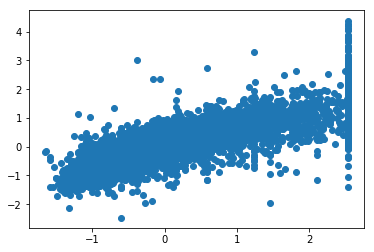

In [185]:
import matplotlib.pyplot as plt

# plt.scatter(x=y_te, y=y_te_estimation) # Original, DON'T DELETE

# Used standardized values
plt.scatter(x=y_test_trans, y=y_te_estimation)
#plt.xlim([-200000,800000])
#plt.ylim([-1.78785,-1.78765])
plt.show()

In [33]:
np.max(y_test_trans)

2.532087262881342

In [37]:
# Let's graph the learning curves

Elastic_net = ElasticNet(alpha = 0.01, l1_ratio = 0.5)

#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
train_errors, val_errors = [], []
for m in range(1, len(X_train_trans), 100):
    mth_X_train_trans = X_train_trans[:m]
    Elastic_net.fit(mth_X_train_trans, y_train_trans[:m])
    y_train_predict = Elastic_net.predict(X_train_trans[:m])
    y_val_predict = Elastic_net.predict(X_test_trans)
    train_errors.append(mean_squared_error(y_train_predict, y_train_trans[:m]))
    val_errors.append(mean_squared_error(y_val_predict, y_test_trans))
    print(m)


1
101
201
301
401
501
601
701
801
901
1001
1101
1201
1301
1401
1501
1601
1701
1801
1901
2001
2101
2201
2301
2401
2501
2601
2701
2801
2901
3001
3101
3201
3301
3401
3501
3601
3701
3801
3901
4001
4101
4201
4301
4401
4501
4601
4701
4801
4901
5001
5101
5201
5301
5401
5501
5601
5701
5801
5901
6001
6101
6201
6301
6401
6501
6601
6701
6801
6901
7001
7101
7201
7301
7401
7501
7601
7701
7801
7901
8001
8101
8201
8301
8401
8501
8601
8701
8801
8901
9001
9101
9201
9301
9401
9501
9601
9701
9801
9901
10001
10101
10201
10301
10401
10501
10601
10701
10801
10901
11001
11101
11201
11301
11401
11501
11601
11701
11801
11901
12001
12101
12201
12301
12401
12501
12601
12701
12801
12901
13001
13101
13201
13301
13401
13501
13601
13701
13801
13901
14001
14101
14201
14301
14401


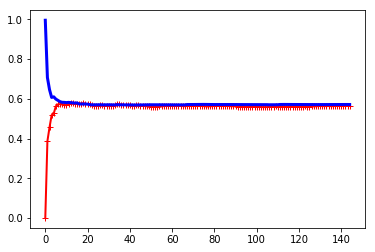

In [38]:
plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
plt.show()

### Question: Before you computed the final_rmse on the test data, what was your expected value for this quantity? Does your best model have high variance?

##### YOUR ANSWER HERE 

My initial expectation in regards to the final_rmse is that it should have been lower than the rmse on the training data and that the Elastic Net would fit the housing test data well. It seems that our final Elastic Net model fits the housing data well. Why ? - rmse on the training data is 0.5693085940347592 and the rmse on the testing data is 0.5714043869205295.

Our final model, Elastic Net, seems to have have a minimal amout of variance as can be seen from the graph above. Additionally, MRSE for train set and test set are low. Next, the difrerence between RMSE for train set and test set is low eventhough RMSE for test set is miniscually higher. Therefore, the variance is low.

Now, let's take a look at plt.scatter(x=y_test_trans, y=y_test_estimation_trans) once again. On the far right, at x ~= 2.5, we can a see a straight vertical line corresponding to the y=y_test_estimation_trans. Therefore, due to that straight line, we might have a higher than necessary variance. Thus, to decrease the variance, we would need to delete some of the values of y=y_test_estimation_trans corresponding to the vertical line and run the model again.

In [188]:
# Now, let's drop some values from x=y_test_trans and y=y_test_estimation_trans

x = y_test_trans
y = y_te_estimation

master_array_1 = np.append(x.reshape(-1,1), y.reshape(-1,1), axis = 1).T
master_array = np.round_(master_array_1, decimals = 6)

In [189]:
master_array

array([[-1.375642, -1.392057,  2.532087, ...,  0.099149, -0.756178,
         0.024848],
       [-1.231869, -0.844502,  0.461159, ...,  0.49947 , -0.791459,
         0.062471]])

In [190]:
master_dframe = pd.DataFrame(master_array).T.sort_values(by = [0], ascending = True)
master_dframe.columns = ['x', 'y']
#master_dframe
rows_to_drop = master_dframe.index[master_dframe['x'] == 2.532087].tolist()
# Dropping the rows
new_master_dframe = master_dframe.drop(rows_to_drop)
new_master_array = np.array(new_master_dframe.T)
x_new = new_master_array[0]
y_new = new_master_array[1]

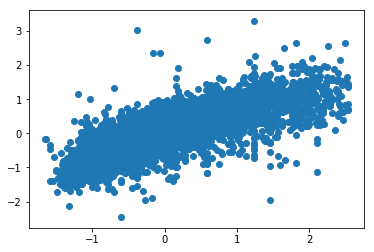

In [191]:
plt.scatter(x=x_new, y=y_new)
plt.show()

In [193]:
final_mse = mean_squared_error(x_new, y_new)
final_rmse = np.sqrt(final_mse)
print(final_rmse) # 0.5091321246868359

0.5091321246868359


WOW! The rmse drops even further. The model seems to fit the data even better. Isn't this great?

#[Optional]
Why does the matrix X appears transponsed in the normal equation in the linear regression? Equation 4.4. Start from equation 4.3



Let's rewrite the MSE cost function for a Linear Regression model in a matrix notation:

$$J(\theta) = \frac{1}{2m} (X \theta  - y)^T(X \theta - y)$$

$$J(\theta) = \frac{1}{2m} ((X \theta)^T - y^T)(X \theta - y)$$
$$J(\theta) = \frac{1}{2m} ((X \theta)^T X \theta - (X \theta)^T y - y^T (X \theta) + y^Ty)$$
$$J(\theta) = \frac{1}{2m} (\theta^T X^T X \theta - 2(X \theta)^T y + y^Ty)$$
$$\frac{\partial J}{\partial \theta} = 2 X^T X \theta  - 2X^T y = 0$$
$$ X^T X \theta = X^T y$$
$$ \hat\theta = (X^T X)^{-1}X^Ty$$

#[Optional]
Do all Gradient Descent algorithms lead to the same model provided you let them run long enough?



If the optimization problem is convex (such as Linear Regression or Logistic Regression), and assuming the learning rate is not too high, then all Gradient Descent algorithms will approachthe global optimum and end up producing fairly similar models. Howere, unless you gradually reduce the learning rate, Stochastic GD and Mini-Batch GD will never truly converge; instead, they will keep jumping back and forth around the global optimum. This means that even if you let them run for a very long time, these Gradient Descent algorithms will produce slightly different models

#[Optional]
Is it a good idea to stop Mini-batch Gradient Descent immediately when the validation error goes up?



Due to their random nature, neither Stochastic Gradient Descent nor Mini-Batch Gradient Descent is guaranteed to make progress at every single iteration. So, if you immediately stop training when the validation error goes up, you may stop much too early, before the optimum is reached. A better option is to save the model at regular intervals, and when it has not improved for a long time (meaning it will probably never beat the record), you can revert to the best saved model.

#[Optional]
Suppose you are using Ridge Regression and you notice that the training error and the validation error are almost equal and fairly high. Would you say that the model suffers from high bias or high variance? Should you increase the regularization hyperparameter α or reduce it?



If both the training error and the validation error are almost equal and fairly high, the model is likely underfitting the training set, which means it has a high bias. We should try reducing the regularization hyperparameter $\alpha$.

#[Optional]
Why does the matrix X appears transponsed in the normal equation in the linear regression? Equation 4.4. Start from equation 4.3



Let's rewrite the MSE cost function for a Linear Regression model in a matrix notation:

$$J(\theta) = \frac{1}{2m} (X \theta  - y)^T(X \theta - y)$$

$$J(\theta) = \frac{1}{2m} ((X \theta)^T - y^T)(X \theta - y)$$
$$J(\theta) = \frac{1}{2m} ((X \theta)^T X \theta - (X \theta)^T y - y^T (X \theta) + y^Ty)$$
$$J(\theta) = \frac{1}{2m} (\theta^T X^T X \theta - 2(X \theta)^T y + y^Ty)$$
$$\frac{\partial J}{\partial \theta} = 2 X^T X \theta  - 2X^T y = 0$$
$$ X^T X \theta = X^T y$$
$$ \hat\theta = (X^T X)^{-1}X^Ty$$